# Are Circadian Genes Dysregulated in Pancreatic Cancer?

This project investigates whether known circadian genes are differentially expressed in pancreatic adenocarcinoma (PAAD) tumors compared to normal tissue using RNA-seq data from TCGA.

### Goal:
Use experimentally validated circadian genes to:
- Extract relevant gene expression profiles from TCGA
- Compare tumor vs. normal tissue
- Identify statistically significant dysregulation

### Dataset Summary:
- **Expression data**: TCGA-PAAD HTSeq (log₂(count + 1))
- **Sample size**: ~150 tumor, 10 normal
- **Gene set**: 32 validated circadian genes from CGDB


In [ ]:
import pandas as pd
import re
from Bio import SeqIO

fasta_file = "circadian_raw.fasta"
ensembl_proteins = []

for record in SeqIO.parse(fasta_file, "fasta"):
    header = record.description
    parts = header.split("|")
    if len(parts) >= 2:
        ensp = parts[1]
        ensembl_proteins.append(ensp)

# Save to file
with open("ensembl_protein_ids.txt", "w") as f:
    for ensp in ensembl_proteins:
        f.write(f"{ensp}\n")

print(f"✅ Extracted {len(ensembl_proteins)} Ensembl Protein IDs.")



✅ Extracted 1888 Ensembl Protein IDs.


## Step 1: Map Circadian Genes to Ensembl Gene IDs

The CGDB outputs circadian genes as Ensembl Protein IDs (ENSP), which don’t match the RNA-seq data (which uses Ensembl Gene IDs - ENSG).  
We convert:

1. **ENSP → Gene Symbol** using downloaded conversion file  
2. **Gene Symbol → ENSG** using `mygene` Python API


In [ ]:
import mygene

# Load your extracted ENSP IDs
with open("ensembl_protein_ids.txt", "r") as f:
    ensp_ids = [line.strip() for line in f.readlines()]

mg = mygene.MyGeneInfo()

# Query all IDs in bulk
results = mg.querymany(ensp_ids, scopes="ensembl.protein", fields="symbol,name", species="human")

# Filter valid results
converted = [r for r in results if "symbol" in r]

# Save to CSV
import csv
with open("circadian_genes_converted.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["ensembl_protein", "gene_symbol", "gene_name"])
    for r in converted:
        writer.writerow([r["query"], r["symbol"], r.get("name", "")])

print(f"✅ Successfully mapped {len(converted)} out of {len(ensp_ids)} ENSP IDs.")


INFO:biothings.client:querying 1-1000 ...
INFO:biothings.client:querying 1001-1888 ...
INFO:biothings.client:Finished.
INFO:biothings.client:Pass "returnall=True" to return complete lists of duplicate or missing query terms.


✅ Successfully mapped 44 out of 1888 ENSP IDs.


In [1]:
!wget https://gdc-hub.s3.us-east-1.amazonaws.com/download/GDC-PANCAN.htseq_counts.tsv

--2025-07-22 22:09:26--  https://gdc-hub.s3.us-east-1.amazonaws.com/download/GDC-PANCAN.htseq_counts.tsv
Resolving gdc-hub.s3.us-east-1.amazonaws.com (gdc-hub.s3.us-east-1.amazonaws.com)... 3.5.17.92, 52.217.128.234, 54.231.171.82, ...
Connecting to gdc-hub.s3.us-east-1.amazonaws.com (gdc-hub.s3.us-east-1.amazonaws.com)|3.5.17.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6756742750 (6.3G) [text/tab-separated-values]
Saving to: ‘GDC-PANCAN.htseq_counts.tsv’

GDC-PANCAN.htseq_co 100%[===================>]   6.29G  19.6MB/s    in 5m 33s  

2025-07-22 22:15:00 (19.3 MB/s) - ‘GDC-PANCAN.htseq_counts.tsv’ saved [6756742750/6756742750]



In [2]:
# Use shell command to just look at the first 5 rows
!head -n 5 expression_data.htseq_counts.tsv


Ensembl_ID	TCGA-OR-A5JP-01A	TCGA-OR-A5JG-01A	TCGA-OR-A5K1-01A	TCGA-OR-A5JR-01A	TCGA-OR-A5KU-01A	TCGA-OR-A5L9-01A	TCGA-OR-A5JQ-01A	TCGA-OR-A5K4-01A	TCGA-OR-A5JL-01A	TCGA-OR-A5LS-01A	TCGA-OR-A5K2-01A	TCGA-OU-A5PI-01A	TCGA-P6-A5OG-01A	TCGA-OR-A5JW-01A	TCGA-OR-A5JF-01A	TCGA-OR-A5J8-01A	TCGA-PA-A5YG-01A	TCGA-OR-A5KV-01A	TCGA-OR-A5L4-01A	TCGA-OR-A5KX-01A	TCGA-OR-A5L8-01A	TCGA-OR-A5JO-01A	TCGA-OR-A5JA-01A	TCGA-OR-A5LO-01A	TCGA-OR-A5JM-01A	TCGA-OR-A5JV-01A	TCGA-OR-A5LC-01A	TCGA-OR-A5JI-01A	TCGA-OR-A5LA-01A	TCGA-OR-A5JE-01A	TCGA-OR-A5JZ-01A	TCGA-OR-A5KO-01A	TCGA-OR-A5KZ-01A	TCGA-OR-A5LJ-01A	TCGA-OR-A5LB-01A	TCGA-OR-A5LT-01A	TCGA-OR-A5LD-01A	TCGA-OR-A5J2-01A	TCGA-OR-A5LE-01A	TCGA-OR-A5JS-01A	TCGA-OR-A5K6-01A	TCGA-OR-A5JY-01A	TCGA-OR-A5JT-01A	TCGA-PK-A5H8-01A	TCGA-OR-A5JX-01A	TCGA-OR-A5LK-01A	TCGA-P6-A5OF-01A	TCGA-OR-A5KT-01A	TCGA-OR-A5K5-01A	TCGA-OR-A5JC-01A	TCGA-OR-A5LP-01A	TCGA-OR-A5JD-01A	TCGA-OR-A5LM-01A	TCGA-PK-A5HA-01A	TCGA-OR-A5J6-01A	TCGA-OR-A5LH-01A	TCGA-OR-A5KY-01A	TCGA-OR-A5LN-01A	TCG

✅ ENSG mapping complete. We now have a list of circadian genes compatible with TCGA expression data.


## Step 2: Subset the Expression Matrix to Circadian Genes

The full TCGA expression matrix contains ~20,000 genes and 11,000+ samples.  
To conserve memory, we stream the matrix and retain only rows matching our 32 circadian ENSG IDs.


In [4]:
import pandas as pd

# Only load the header
with open("expression_data.htseq_counts.tsv", "r") as f:
    header_line = f.readline().strip().split("\t")

print(f"🧪 Number of samples: {len(header_line) - 1}")
print(f"📌 Sample IDs (first 10): {header_line[1:11]}")


🧪 Number of samples: 11057
📌 Sample IDs (first 10): ['TCGA-OR-A5JP-01A', 'TCGA-OR-A5JG-01A', 'TCGA-OR-A5K1-01A', 'TCGA-OR-A5JR-01A', 'TCGA-OR-A5KU-01A', 'TCGA-OR-A5L9-01A', 'TCGA-OR-A5JQ-01A', 'TCGA-OR-A5K4-01A', 'TCGA-OR-A5JL-01A', 'TCGA-OR-A5LS-01A']


In [8]:
# 1. Get circadian symbols from your file
circadian_df = pd.read_csv("circadian_genes_converted.csv")
circadian_symbols = circadian_df["gene_symbol"].dropna().unique().tolist()

# 2. Load expression file line by line, keeping only matching genes
import pandas as pd

filtered_rows = []
with open("expression_data.htseq_counts.tsv", "r") as f:
    header = f.readline()
    filtered_rows.append(header)
    for line in f:
        if any(symbol in line for symbol in circadian_symbols):
            filtered_rows.append(line)

# 3. Save smaller version
with open("expression_circadian_subset.tsv", "w") as f:
    f.writelines(filtered_rows)

# 4. Now load the much smaller version
df_circadian_expr = pd.read_csv("expression_circadian_subset.tsv", sep="\t", index_col=0)


## Step 3: Match Tumor and Normal Samples Using Phenotype Metadata

TCGA metadata (`phenotype_data.tsv`) contains sample barcodes and sample types (tumor or normal).  
We use this to:
- Extract barcodes for primary tumors and normal tissues
- Match those barcodes with expression matrix columns


In [9]:
# Load phenotype data
phenotypes = pd.read_csv("phenotype_data.tsv", sep="\t", index_col=0)

print("✅ Phenotype data loaded")
print(phenotypes.shape)
phenotypes.head()


✅ Phenotype data loaded
(196, 114)


,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,...,_GENOMIC_ID_TCGA_PAAD_RPPA,_GENOMIC_ID_TCGA_PAAD_hMethyl450,_GENOMIC_ID_TCGA_PAAD_mutation,_GENOMIC_ID_TCGA_PAAD_PDMRNAseq,_GENOMIC_ID_TCGA_PAAD_PDMRNAseqCNV,_GENOMIC_ID_TCGA_PAAD_mutation_broad_gene,_GENOMIC_ID_TCGA_PAAD_gistic2thd,_GENOMIC_ID_data/public/TCGA/PAAD/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_PAAD_miRNA_HiSeq,_GENOMIC_ID_TCGA_PAAD_exp_HiSeqV2_percentile
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1-01,MSS,TCGA-2J-AAB1-01,TCGA-2J-AAB1,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,65,...,NaN,TCGA-2J-AAB1-01A-11D-A40Y-05,NaN,TCGA-2J-AAB1-01,TCGA-2J-AAB1-01,TCGA-2J-AAB1-01A-11D-A40W-08,TCGA-2J-AAB1-01A-11D-A40V-01,TCGA-2J-AAB1-01,TCGA-2J-AAB1-01,bf6773cf-f233-4990-885e-56073c92cb0c
TCGA-2J-AAB4-01,MSS,TCGA-2J-AAB4-01,TCGA-2J-AAB4,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NO,NO,YES,48,...,118DE429-5F7E-4622-8F85-151925B6949B,TCGA-2J-AAB4-01A-12D-A40Y-05,NaN,TCGA-2J-AAB4-01,TCGA-2J-AAB4-01,TCGA-2J-AAB4-01A-12D-A40W-08,TCGA-2J-AAB4-01A-12D-A40V-01,TCGA-2J-AAB4-01,TCGA-2J-AAB4-01,435de9a0-3c2b-4b4f-87d1-92f37a0765b5
TCGA-2J-AAB6-01,MSS,TCGA-2J-AAB6-01,TCGA-2J-AAB6,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,75,...,NaN,TCGA-2J-AAB6-01A-11D-A40Y-05,NaN,TCGA-2J-AAB6-01,TCGA-2J-AAB6-01,TCGA-2J-AAB6-01A-11D-A40W-08,TCGA-2J-AAB6-01A-11D-A40V-01,TCGA-2J-AAB6-01,TCGA-2J-AAB6-01,a737c8ad-5796-47f9-8505-4e7fb2a297ed
TCGA-2J-AAB8-01,MSS,TCGA-2J-AAB8-01,TCGA-2J-AAB8,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,71,...,A64C3BC6-4748-4904-88E8-B62DFB3EE6DE,TCGA-2J-AAB8-01A-12D-A40Y-05,NaN,TCGA-2J-AAB8-01,TCGA-2J-AAB8-01,TCGA-2J-AAB8-01A-12D-A40W-08,TCGA-2J-AAB8-01A-12D-A40V-01,TCGA-2J-AAB8-01,TCGA-2J-AAB8-01,b9173a1f-a255-4e0e-88d2-ded795ba0e7b
TCGA-2J-AAB9-01,MSS,TCGA-2J-AAB9-01,TCGA-2J-AAB9,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,70,...,A04E5FF9-552D-462D-B9EE-23B9933324E0,TCGA-2J-AAB9-01A-11D-A40Y-05,NaN,TCGA-2J-AAB9-01,TCGA-2J-AAB9-01,TCGA-2J-AAB9-01A-11D-A40W-08,TCGA-2J-AAB9-01A-11D-A40V-01,TCGA-2J-AAB9-01,TCGA-2J-AAB9-01,23da230e-1c63-4e5b-bf92-8a1bec33073c


In [13]:
# Truncate expression matrix columns to 15 characters (first 3 fields + vial ID)
df_circadian_expr.columns = df_circadian_expr.columns.str.slice(0, 15)

# Try matching again
tumor_ids = [s for s in df_circadian_expr.columns if s.endswith("-01")]
normal_ids = [s for s in df_circadian_expr.columns if s.endswith("-11")]

print(f"✅ Tumor samples: {len(tumor_ids)} | Normal samples: {len(normal_ids)}")


✅ Tumor samples: 9724 | Normal samples: 730


In [35]:
!pip install mygene

import pandas as pd
import mygene

# Step 1: Load circadian genes
circadian_df = pd.read_csv("circadian_genes_converted.csv")

# Step 2: Use mygene to convert gene symbols → ENSG IDs
mg = mygene.MyGeneInfo()
query = circadian_df["gene_symbol"].tolist()

# Query in batches (handle errors too)
gene_info = mg.querymany(query, scopes="symbol", fields="ensembl.gene", species="human")

# Step 3: Convert to DataFrame
gene_df = pd.DataFrame(gene_info)

# Some rows may return multiple Ensembl IDs, so we flatten
gene_df["ensg_id"] = gene_df["ensembl"].apply(
    lambda x: x[0]["gene"] if isinstance(x, list) else (x["gene"] if isinstance(x, dict) else None)
)

# Step 4: Merge back into circadian_df
circadian_ensg = circadian_df.merge(gene_df[["query", "ensg_id"]], left_on="gene_symbol", right_on="query", how="left")

# Drop rows without valid ENSG mapping
circadian_ensg = circadian_ensg.dropna(subset=["ensg_id"])

# Optional: Save for later
circadian_ensg.to_csv("circadian_genes_with_ensg.csv", index=False)

# Preview
circadian_ensg.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 829.1 kB/s eta 0:00:00


INFO:biothings.client:querying 1-44 ...
INFO:biothings.client:Finished.


,ensembl_protein,gene_symbol,gene_name,query,ensg_id
0,ENSP00000243326,RIF1,replication timing regulatory factor 1,RIF1,ENSG00000080345
1,ENSP00000251372,LILRA1,leukocyte immunoglobulin like receptor A1,LILRA1,ENSG00000104974
2,ENSP00000253934,TMEM204,transmembrane protein 204,TMEM204,ENSG00000131634
3,ENSP00000259875,DDR1,discoidin domain receptor tyrosine kinase 1,DDR1,ENSG00000230456
4,ENSP00000260648,PREPL,prolyl endopeptidase like,PREPL,ENSG00000138078


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('ensembl_protein').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('gene_symbol').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('gene_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('query').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['gene_symbol'].value_counts()
    for x_label, grp in _df_4.groupby('ensembl_protein')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ensembl_protein')
_ = plt.ylabel('gene_symbol')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['gene_name'].value_counts()
    for x_label, grp in _df_5.groupby('gene_symbol')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gene_symbol')
_ = plt.ylabel('gene_name')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['query'].value_counts()
    for x_label, grp in _df_6.groupby('gene_name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gene_name')
_ = plt.ylabel('query')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ensg_id'].value_counts()
    for x_label, grp in _df_7.groupby('query')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('query')
_ = plt.ylabel('ensg_id')

In [36]:
circadian_ensg["ensg_id"].head(10).tolist()

['ENSG00000080345',
 'ENSG00000104974',
 'ENSG00000131634',
 'ENSG00000230456',
 'ENSG00000138078',
 'ENSG00000274311',
 'ENSG00000144120',
 'ENSG00000086730',
 'ENSG00000288250',
 'ENSG00000151726']

## Step 4: Differential Expression Analysis

We use Welch's t-test (scipy's `ttest_ind` with unequal variance) to compare gene expression between tumor and normal groups.  
We also compute:
- **log₂ fold change (Tumor - Normal)**
- **FDR correction** using Benjamini-Hochberg


In [39]:
import pandas as pd

# Load the ENSG IDs you care about into a set for fast lookup
circadian_ensg_ids = set(circadian_ensg["ensg_id"].dropna().str.split(".").str[0].unique())

# Stream through expression matrix and only keep matching rows
filtered_rows = []
with open("expression_data.htseq_counts.tsv", "r") as infile:
    header = infile.readline()
    filtered_rows.append(header)  # keep header

    for line in infile:
        gene_id = line.split("\t")[0].split(".")[0]  # strip version
        if gene_id in circadian_ensg_ids:
            filtered_rows.append(line)

# Save to new filtered file
with open("expression_circadian_subset.tsv", "w") as out:
    out.writelines(filtered_rows)

# Load into DataFrame (now small)
circadian_expr = pd.read_csv("expression_circadian_subset.tsv", sep="\t", index_col=0)

# Confirm shape
print("Subset shape:", circadian_expr.shape)
circadian_expr.head()


Subset shape: (32, 11057)


,TCGA-OR-A5JP-01A,TCGA-OR-A5JG-01A,TCGA-OR-A5K1-01A,TCGA-OR-A5JR-01A,TCGA-OR-A5KU-01A,TCGA-OR-A5L9-01A,TCGA-OR-A5JQ-01A,TCGA-OR-A5K4-01A,TCGA-OR-A5JL-01A,TCGA-OR-A5LS-01A,...,TCGA-VD-A8KI-01A,TCGA-V4-A9E9-01A,TCGA-V4-A9F7-01A,TCGA-V4-A9EO-01A,TCGA-V4-A9EU-01A,TCGA-WC-A87T-01A,TCGA-WC-AA9A-01A,TCGA-V4-A9EA-01A,TCGA-RZ-AB0B-01A,TCGA-V4-A9F8-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000035115.20,12.973877,10.807355,9.654636,9.609179,10.032046,7.257388,10.446049,10.181152,10.227616,10.703038,...,7.727920,6.906891,10.380461,9.583083,10.203348,10.829723,10.486835,6.539159,9.939579,7.417853
ENSG00000075420.11,12.402746,9.731319,10.198445,11.754470,10.200899,6.942515,12.545688,10.676839,10.933691,12.048827,...,9.796040,8.558421,10.855647,11.172428,12.033423,10.388017,10.491853,7.994353,10.649256,8.968667
ENSG00000080345.16,11.064743,10.538189,9.552669,11.001408,9.758223,6.988685,11.275543,10.751544,10.409391,10.417853,...,9.108524,7.906891,11.147841,10.458407,11.400879,11.310045,11.179287,6.882643,10.757390,8.280771
ENSG00000086730.15,6.965784,8.184875,6.475733,8.748193,6.475733,6.087463,9.266787,6.507795,7.285402,4.857981,...,6.357552,4.906891,6.266787,6.108524,7.434628,6.459432,6.000000,4.321928,6.442943,5.754888
ENSG00000104974.9,3.000000,3.321928,2.584963,4.700440,2.321928,1.000000,5.392317,1.000000,4.643856,3.700440,...,1.584963,1.584963,3.459432,2.000000,4.321928,3.459432,1.000000,2.000000,3.321928,4.523562


### Volcano Plot: Circadian Gene Expression in PAAD

- X-axis: log₂ fold change (Tumor - Normal)
- Y-axis: -log₁₀(FDR)
- Red dots: significant genes (FDR < 0.05 and |log2FC| > 1)

Only RAB24 (downregulated) and WDR75 (upregulated) are statistically significant.


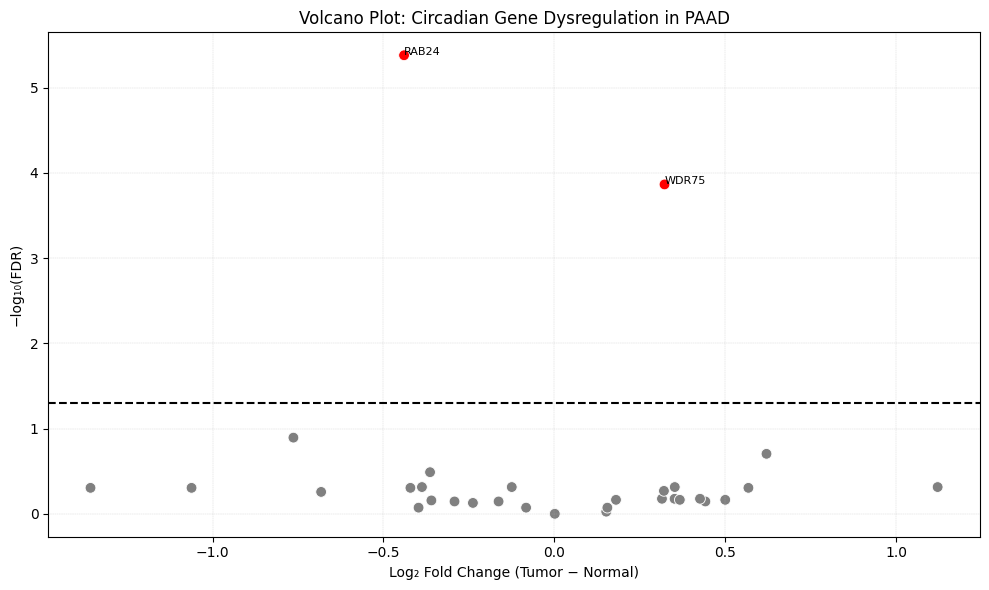

,gene_symbol,log2fc,pval,fdr
19,RAB24,-0.439712,1.304186e-07,0.000004
6,WDR75,0.322154,8.545583e-06,0.000137
3,LAT2,-0.763354,1.196995e-02,0.127679
15,ANAPC1,0.620433,2.471972e-02,0.197758
22,TP53I11,-0.363679,5.074101e-02,0.324742
23,RBIS,0.352120,1.364829e-01,0.485272
31,H2BC6,1.121068,1.270813e-01,0.485272
5,PRKAR1A,-0.124687,1.183951e-01,0.485272
29,C14orf132,-0.387406,1.322527e-01,0.485272
10,TMEM204,-0.421098,2.014088e-01,0.495775


In [48]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get tumor and normal sample barcodes that match the matrix
tumor_samples = pheno[pheno["sample_type"] == "Primary Tumor"]["bcr_sample_barcode"].tolist()
normal_samples = pheno[pheno["sample_type"] == "Solid Tissue Normal"]["bcr_sample_barcode"].tolist()
tumor_cols = [s for s in tumor_samples if s in circadian_expr_filtered.columns]
normal_cols = [s for s in normal_samples if s in circadian_expr_filtered.columns]

# Step 2: Run Welch's t-test and compute log2FC for each circadian gene
results = []
for gene in circadian_expr_filtered.index:
    tumor_vals = circadian_expr_filtered.loc[gene, tumor_cols].astype(float)
    normal_vals = circadian_expr_filtered.loc[gene, normal_cols].astype(float)

    stat, pval = ttest_ind(tumor_vals, normal_vals, equal_var=False)
    log2fc = tumor_vals.mean() - normal_vals.mean()  # already log2 scale
    results.append({"gene": gene, "log2fc": log2fc, "pval": pval})

results_df = pd.DataFrame(results)

# Step 3: Adjust p-values using FDR
results_df["fdr"] = multipletests(results_df["pval"], method="fdr_bh")[1]

# Step 4: Mark significance
results_df["significant"] = results_df["fdr"] < 0.05

# Step 5: Merge with gene symbols
results_df = results_df.merge(
    circadian_ensg[["ensg_id", "gene_symbol"]],
    left_on="gene", right_on="ensg_id", how="left"
)

# Step 6: Volcano plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=results_df["log2fc"],
    y=-np.log10(results_df["fdr"]),
    hue=results_df["significant"],
    palette={True: "red", False: "gray"},
    legend=False,
    s=60
)

# Add gene labels for significant hits
for _, row in results_df.iterrows():
    if row["significant"]:
        plt.text(row["log2fc"], -np.log10(row["fdr"]), row["gene_symbol"], fontsize=8)

# Plot styling
plt.title("Volcano Plot: Circadian Gene Dysregulation in PAAD")
plt.xlabel("Log₂ Fold Change (Tumor − Normal)")
plt.ylabel("−log₁₀(FDR)")
plt.axhline(-np.log10(0.05), ls="--", color="black", label="FDR = 0.05")
plt.grid(True, linestyle="--", linewidth=0.3, alpha=0.6)
plt.tight_layout()
plt.show()

# Step 7: Show top 10 dysregulated circadian genes by FDR
results_df = results_df.sort_values("fdr")
results_df[["gene_symbol", "log2fc", "pval", "fdr"]].head(10)


## Step 5: Gene Symbol Annotation and Summary Table

We merge the analysis results with gene symbols for interpretability and present the top 10 genes.


In [46]:
# Merge results with gene symbol info
final_df = results_df.merge(
    circadian_ensg[["ensg_id", "gene_symbol"]],
    left_on="gene", right_on="ensg_id", how="left"
)

# Preview top annotated results
final_df[["gene_symbol", "log2fc", "pval", "fdr"]].sort_values("fdr").head(10)


,gene_symbol,log2fc,pval,fdr
0,RAB24,-0.439712,1.304186e-07,0.000004
1,WDR75,0.322154,8.545583e-06,0.000137
2,LAT2,-0.763354,1.196995e-02,0.127679
3,ANAPC1,0.620433,2.471972e-02,0.197758
4,TP53I11,-0.363679,5.074101e-02,0.324742
5,RBIS,0.352120,1.364829e-01,0.485272
6,H2BC6,1.121068,1.270813e-01,0.485272
7,PRKAR1A,-0.124687,1.183951e-01,0.485272
8,C14orf132,-0.387406,1.322527e-01,0.485272
9,TMEM204,-0.421098,2.014088e-01,0.495775


## Conclusion

This analysis of TCGA-PAAD RNA-seq data shows that most circadian genes are not strongly dysregulated in pancreatic cancer.  
However, two genes — **RAB24** (downregulated) and **WDR75** (upregulated) — exhibit statistically significant differences in expression between tumor and normal tissue.

These findings suggest that:
- Circadian disruption in PAAD may be selective rather than global
- Specific circadian genes may serve as biomarkers or therapeutic targets

Future work could include:
- Cross-cancer comparison of circadian gene dysregulation
- Time-course or chronotherapy-related datasets
- Functional enrichment and pathway interaction mapping
